In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import scikitplot as skplt


nucleus_dataset = pd.read_csv("CD86_smooth_nuclei_M2_NT_M1NucleiObj.csv")

In [2]:
nucleus_dataset.loc[nucleus_dataset['ImageNumber'].isin([1,2,3,4,5]), 'CellType'] = 'M1'
nucleus_dataset.loc[nucleus_dataset['ImageNumber'].isin([6,7,8]), 'CellType'] = 'M2'
nucleus_dataset.loc[nucleus_dataset['ImageNumber'].isin([9,10,11]), 'CellType'] = 'NT'
nucleus_dataset.drop(['ImageNumber', 'ObjectNumber'], axis=1, inplace=True)

X_nucleus = nucleus_dataset.drop('CellType', axis=1)
y_nucleus = nucleus_dataset['CellType']

0.9318885448916409


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

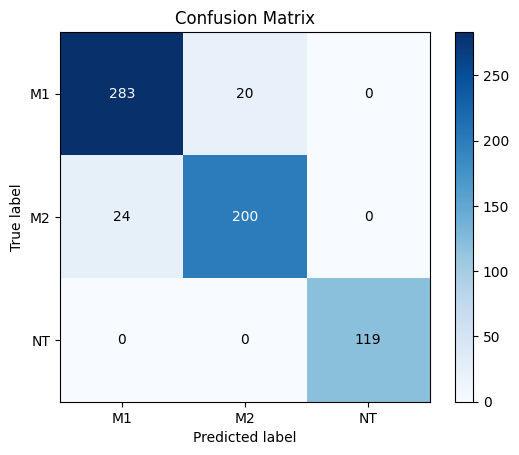

In [3]:
# retrieve the best model
params = {'C': 10000.0, 'max_iter': 15000, 'penalty': 'l2'}
model = LogisticRegression()
model.set_params(**params)

scaler = StandardScaler()
X_nucleus_scaled = scaler.fit_transform(X_nucleus)
X_train, X_test, y_train, y_test = train_test_split(X_nucleus_scaled, y_nucleus, test_size = 0.25, random_state=0)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))
y_pred = model.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, title = 'Confusion Matrix')

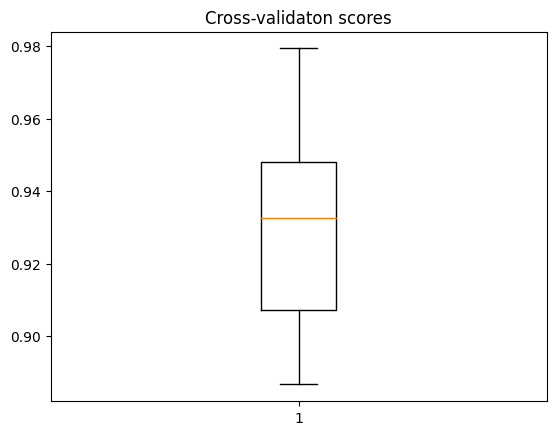

In [5]:
kf = KFold(n_splits=20, shuffle=True, random_state=666)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
plt.boxplot(cv_scores)
plt.title("Cross-validaton scores")
plt.show()

In [42]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from itertools import cycle


y_nucleus_bin = label_binarize(y_nucleus, classes=['M1', 'M2', 'NT'])
X_train, X_test, y_train, y_test = train_test_split(X_nucleus_scaled, y_nucleus_bin, test_size = 0.25, random_state=0)

model_1 = LogisticRegression(random_state=0)\
    .fit(X_train, y_train[:, 0])
model_2 = LogisticRegression(random_state=0)\
    .fit(X_train, y_train[:, 1])
model_3 = LogisticRegression(random_state=0)\
    .fit(X_train, y_train[:, 2])
 
print(f"Model Accuracy :")
print(f"model M1 - {model_1.score(X_test, y_test[:, 0])}")
print(f"model M2 - {model_2.score(X_test, y_test[:, 1])}")
print(f"model NT - {model_3.score(X_test, y_test[:, 2])}")

c:\_\jupyter_3\venv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\_\jupyter_3\venv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  

Model Accuracy :
model M1 - 0.8544891640866873
model M2 - 0.8931888544891641
model NT - 1.0


In [34]:
model = OneVsRestClassifier(LogisticRegression(random_state=0))\
    .fit(X_train, y_train)
prob_test_vec = model.predict_proba(X_test)
 
n_classes = 3
fpr = [0] * 3
tpr = [0] * 3
thresholds = [0] * 3
auc_score = [0] * 3
 
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test[:, i],
                                              prob_test_vec[:, i])
    auc_score[i] = auc(fpr[i], tpr[i])

print('AUC scores for M1, M2 and NT cells are', auc_score)
print('Accuracy is', sum(auc_score) / n_classes)

AUC scores for M1, M2 and NT cells are [0.9297308739620318, 0.9504273865944483, 1.0]
Accuracy is 0.9600527535188267


c:\_\jupyter_3\venv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\_\jupyter_3\venv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  

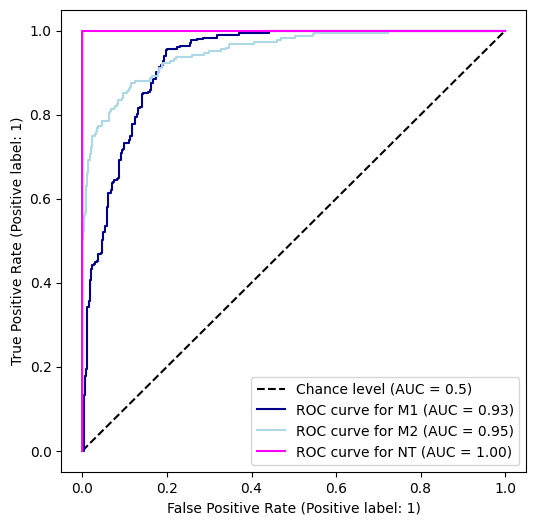

In [41]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")
target_names = ['M1', 'M2', 'NT']
colors = cycle(["darkblue", "lightblue", "magenta"])
for class_id, color in zip(range(3), colors):
    RocCurveDisplay.from_predictions(
        y_test[:, class_id],
        prob_test_vec[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )